In [1]:
import pandas as pd

# Define file path
file_path = "rs.csv"

# Step 1: Load CSV in chunks if it's a large file
chunk_size = 50000  # Define chunk size based on your memory constraints
chunks = []

for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False, 
                         dtype={'column1': 'category', 'column2': 'int32'}):  # Specify column data types
    # Optional: Process each chunk, e.g., filter out unwanted data if needed
    chunks.append(chunk)

# Concatenate chunks into a single DataFrame
data = pd.concat(chunks, ignore_index=True)

# Step 2: Data Cleaning
# Drop duplicates if necessary
data.drop_duplicates(inplace=True)

# Handle missing values by forward filling as an example
data.fillna(method='ffill', inplace=True)

# Step 3: Save the cleaned data (Optional, for faster future access)
data.to_csv("cleaned_data.csv", index=False)

# Step 4: Verify by inspecting data types, memory usage, and preview
print(data.info())       # Check data types and memory usage
print(data.head())       # Preview first few rows




C:\Users\ironman\AppData\Local\Temp\ipykernel_2148\2519961547.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   zomato_url         224520 non-null  object 
 1   name               224520 non-null  object 
 2   city               224520 non-null  object 
 3   area               224520 non-null  object 
 4   rating             224520 non-null  float64
 5   rating_count       224520 non-null  float64
 6   telephone          224520 non-null  object 
 7   cusine             224520 non-null  object 
 8   cost_for_two       224520 non-null  float64
 9   address            224520 non-null  object 
 10  timings            224520 non-null  object 
 11  online_order       224520 non-null  bool   
 12  table_reservation  224520 non-null  bool   
 13  delivery_only      224520 non-null  bool   
 14  famous_food        224519 non-null  object 
 15  longitude          224520 non-null  float64
 16  la

In [4]:
# Average rating by area
avg_rating_area = data.groupby('area')['rating'].mean()

# Top-rated restaurants
top_rated = data.nlargest(10, 'rating')

# Rating distribution
rating_distribution = data['rating'].value_counts().sort_index()


In [5]:
# Cuisine frequency
cuisine_count = data['cusine'].value_counts()

# Average cost for two by cuisine
avg_cost_cuisine = data.groupby('cusine')['cost_for_two'].mean()

# Average rating by cuisine
avg_rating_cuisine = data.groupby('cusine')['rating'].mean()


In [6]:
# Top areas by restaurant count
top_areas = data['area'].value_counts()

# Restaurants with online ordering
online_order_areas = data[data['online_order'] == True]['area'].value_counts()

# Restaurants with delivery only
delivery_only_areas = data[data['delivery_only'] == True]['area'].value_counts()


In [7]:
# Most mentioned famous food items
famous_food_count = data['famous_food'].value_counts()

# Restaurants with highest number of ratings
most_rated_restaurants = data.nlargest(10, 'rating_count')


In [8]:
# Restaurants offering table reservations
table_reservation_count = data['table_reservation'].value_counts()

# Average rating by online order availability
avg_rating_online_order = data.groupby('online_order')['rating'].mean()

# Average rating by delivery only
avg_rating_delivery_only = data.groupby('delivery_only')['rating'].mean()


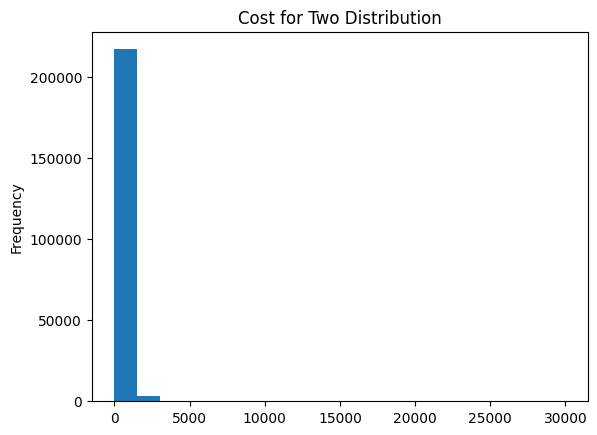

In [9]:
# Average cost for two by area
avg_cost_area = data.groupby('area')['cost_for_two'].mean()

# Cost distribution
cost_distribution = data['cost_for_two'].plot.hist(bins=20, title="Cost for Two Distribution")


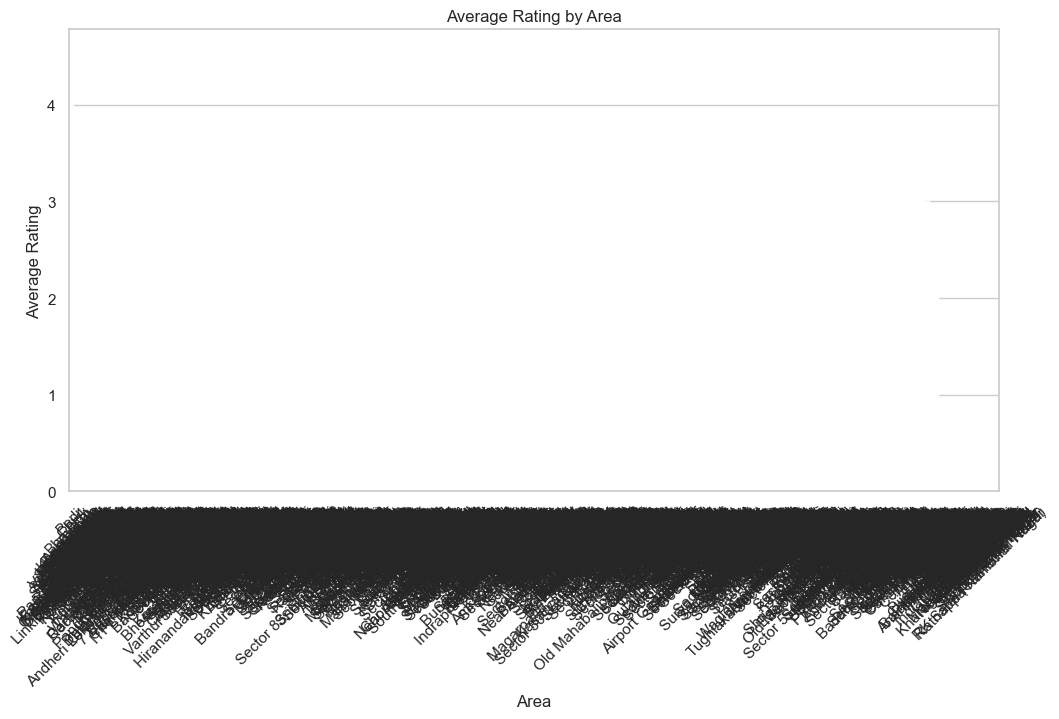

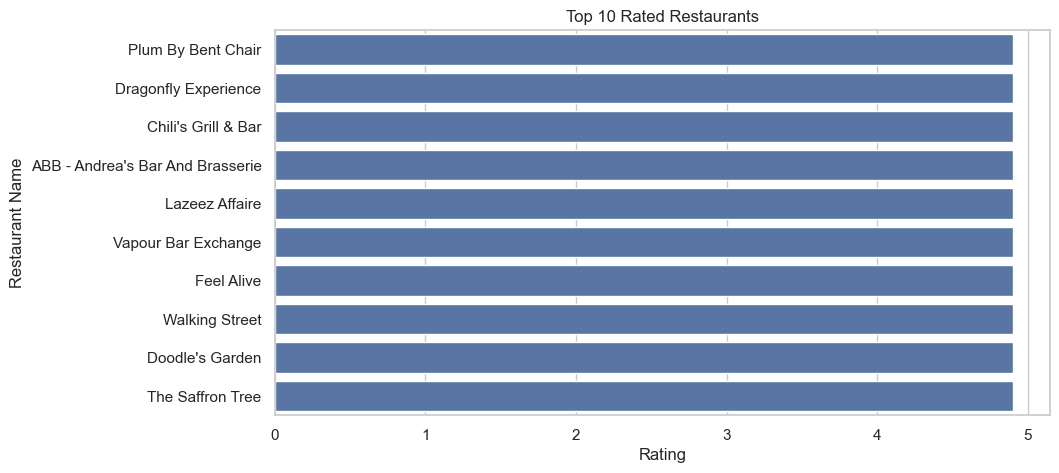

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original dataset
file_path = "rs.csv"
data = pd.read_csv(file_path, low_memory=False)

# Set Seaborn style for better aesthetics
sns.set(style='whitegrid')

# 1. Average Rating by Area
plt.figure(figsize=(12, 6))
avg_rating_area = data.groupby('area')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_area.index, y=avg_rating_area.values)
plt.title('Average Rating by Area')
plt.xlabel('Area')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# 2. Top Rated Restaurants
plt.figure(figsize=(10, 5))
top_rated = data.nlargest(10, 'rating')
sns.barplot(x='rating', y='name', data=top_rated)
plt.title('Top 10 Rated Restaurants')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.show()

# 3. Cuisine Popularity
plt.figure(figsize=(12, 6))
cuisine_count = data['cusine'].value_counts()
sns.barplot(x=cuisine_count.index, y=cuisine_count.values)
plt.title('Cuisine Popularity')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# 4. Average Cost for Two by Cuisine
plt.figure(figsize=(12, 6))
avg_cost_cuisine = data.groupby('cusine')['cost_for_two'].mean().sort_values(ascending=False)
sns.barplot(x=avg_cost_cuisine.index, y=avg_cost_cuisine.values)
plt.title('Average Cost for Two by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45)
plt.show()

# 5. Distribution of Ratings
plt.figure(figsize=(10, 5))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 6. Restaurants with Online Ordering vs. Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x='online_order', y='rating', data=data)
plt.title('Rating Comparison: Online Ordering vs. Not')
plt.xlabel('Online Order Availability')
plt.ylabel('Rating')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 7. Cost for Two Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['cost_for_two'], bins=20, kde=True)
plt.title('Distribution of Cost for Two')
plt.xlabel('Cost for Two')
plt.ylabel('Frequency')
plt.show()
